<a href="https://colab.research.google.com/github/giakomorssi/AI-Snake/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read the data and create a graph.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Change Colab runtime to GPU
import os
os.environ['COLAB_TPU_ADDR'] = ''
os.environ['COLAB_GPU_ALLOC'] = '1'
os.environ['COLAB_GPU'] = '1'
print("Runtime switched to GPU")

import tensorflow as tf

if not tf.test.gpu_device_name():
    print('GPU device not found')
else:
    print('GPU device found:', tf.test.gpu_device_name())

# This code sets the runtime to use the GPU if available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Runtime switched to GPU
GPU device not found
Please install GPU version of TF


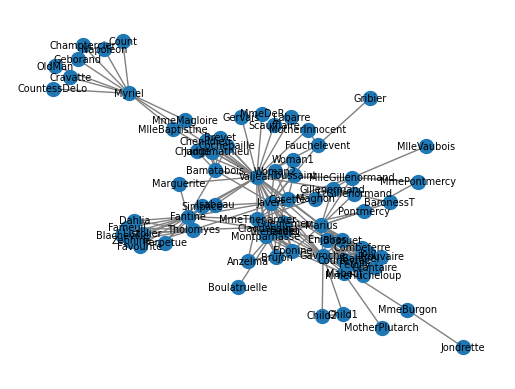

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Read .gml file
G = nx.read_gml('/content/drive/MyDrive/University/DataViz/lesmis.gml')

# Draw the network
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=7, font_family='sans-serif')

# Show the plot
plt.axis('off')
plt.show()

## Find the number of edges and nodes of the graph.

In [ ]:
# Calculate number of edges and nodes
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()

print(f"Number of edges: {num_edges}")
print(f"Number of nodes: {num_nodes}")

Number of edges: 254
Number of nodes: 77


## Calculate the betweenness and degree centrality measures for the nodes in the graph. 
Identify the top five nodes with the highest betweenness centrality and the top five nodes with the highest degree centrality. Can you draw any conclusions about their significance?

In [ ]:
# Calculate betweenness and degree centrality measures
betweenness = nx.betweenness_centrality(G)
degree = nx.degree_centrality(G)

# Get top five nodes with highest betweenness centrality
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top five nodes with highest betweenness centrality:")
for node, centrality in top_betweenness:
    print(f"{node}: {centrality}")

# Get top five nodes with highest degree centrality
top_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop five nodes with highest degree centrality:")
for node, centrality in top_degree:
    print(f"{node}: {centrality}")

Top five nodes with highest betweenness centrality:
Valjean: 0.5699890527836184
Myriel: 0.17684210526315788
Gavroche: 0.16511250242584766
Marius: 0.132032488621946
Fantine: 0.12964454098819422

Top five nodes with highest degree centrality:
Valjean: 0.47368421052631576
Gavroche: 0.2894736842105263
Marius: 0.25
Javert: 0.22368421052631576
Thenardier: 0.21052631578947367


## Compare the number of triangles in this graph with a null model.
Create 100 graphs using the model G(n; p).
For each one of them compute the number of triangles and store it as we will plot the distribution in the next point. (2 point)


In [ ]:
# Count number of triangles in the graph
num_triangles = sum(nx.triangles(G).values()) // 3

print(f"Number of triangles: {num_triangles}")

Number of triangles: 467



### Choose the right G(n; p) model.


Estimated value of p based on degree distribution: 0.0857
Average number of triangles in random graphs: 45.3200
Standard deviation of triangle counts in random graphs: 9.7907 



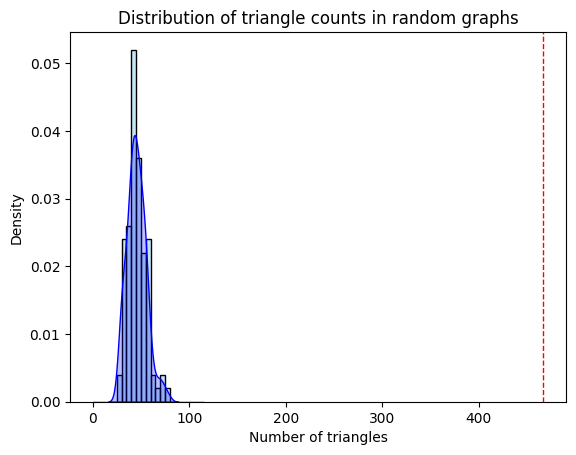

In [ ]:
# Calculate the average degree
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()

# Estimate p from the average degree
p = avg_degree / G.number_of_nodes()

print(f"Estimated value of p based on degree distribution: {p:.4f}")

# Create 100 random graphs using the G(n,p) model
num_graphs = 100
triangles = []
for i in range(num_graphs):
    G_random = nx.gnp_random_graph(n, p)
    num_triangles_r = sum(nx.triangles(G_random).values()) // 3
    triangles.append(num_triangles_r)

# Print average and standard deviation of triangle counts in random graphs
print(f"Average number of triangles in random graphs: {np.mean(triangles):.4f}")
print(f"Standard deviation of triangle counts in random graphs: {np.std(triangles):.4f} \n")

import seaborn as sns

# create bar plot with triangle counts
sns.histplot(triangles, color='skyblue', alpha=0.5, bins=range(0, 120, 5), stat='density')
plt.axvline(num_triangles, color='red', linestyle='dashed', linewidth=1)

# create KDE plot on top of bar plot
sns.kdeplot(triangles, color='blue', fill=True)

plt.xlabel('Number of triangles')
plt.ylabel('Density')
plt.title('Distribution of triangle counts in random graphs')
plt.show()

## Choose an algorithm that we have covered in class for identifying communities. 
Apply the chosen algorithm on the graph of ”Les Miserables” and visualise the network using node color to differentiate between communities. Choose a suitable layout to visualize the network. 

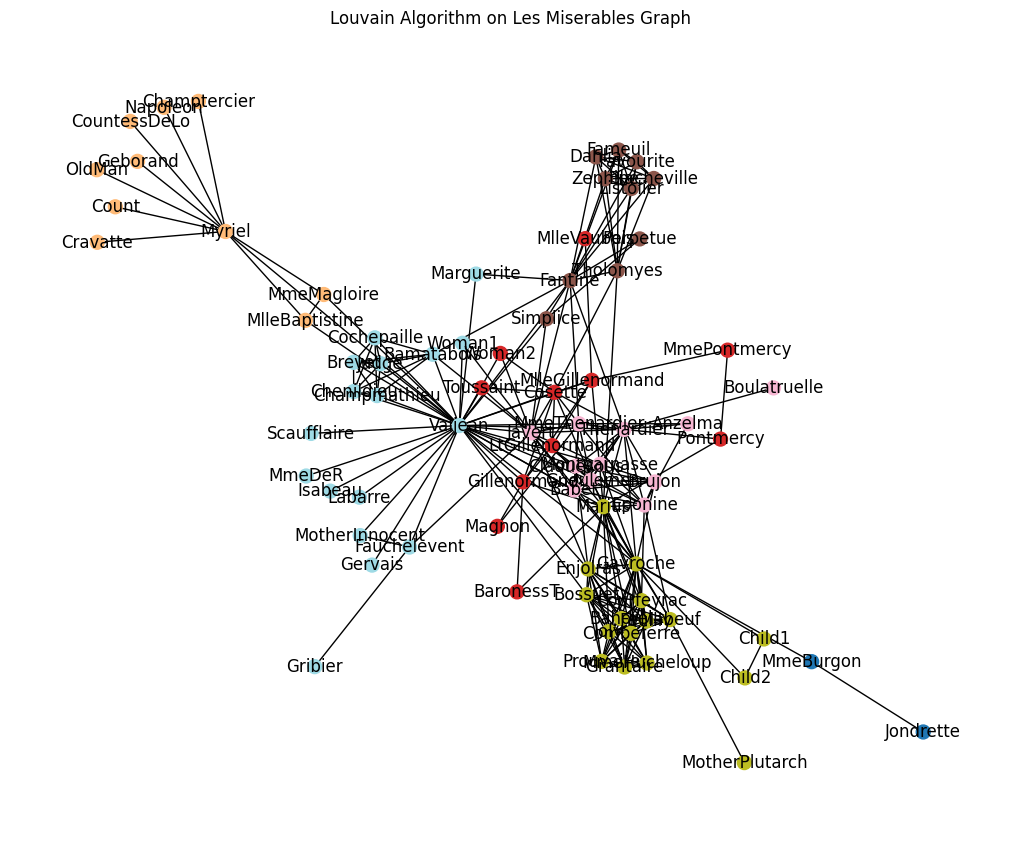

In [ ]:
import networkx as nx
import community.community_louvain as cl
import matplotlib.pyplot as plt

# apply Louvain algorithm
partition = cl.best_partition(G)

# visualize network with community colors
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=100, node_color=list(partition.values()), cmap='tab20', with_labels=True)
plt.title("Louvain Algorithm on Les Miserables Graph")
plt.show()